In [20]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import graphviz
from sklearn.tree import export_graphviz

In [21]:
df = pd.read_csv('data/student.csv', encoding='utf-8-sig')
df.head()

,gre,gpa,rank,sex,age,nationality,admit
0,380.0,3.61,3,f,19,Korea,불합격
1,660.0,3.67,3,f,18,Korea,NaN
2,800.0,4.00,1,m,19,Korea,합격
3,NaN,3.19,4,m,19,Korea,합격
4,520.0,2.93,4,f,19,Korea,불합격


In [22]:
df = df.drop(['nationality'], axis = 1)

In [23]:
df['sex'] = df.sex.map({'f':0,'m':1})
df['admit'] = df.admit.map({'불합격':0,'합격':1})

In [24]:
df.gre.fillna(df.gre.median(), inplace=True)
df.gpa.fillna(df.gpa.median(), inplace = True)

In [25]:
df = df.dropna(axis = 0)

In [26]:
X = np.array(df.iloc[:,:-1])
y = np.array(df['admit'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [28]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
temp_y_pred = tree.predict(X_test)
temp_acc = accuracy_score(y_test, temp_y_pred)

print('정확도: ',format(temp_acc))

정확도:  0.6916666666666667


In [30]:
train_scores, test_scores = list(),list()
for i in range(1,20):
    DT = DecisionTreeClassifier(max_depth=i)
    DT.fit(X_train, y_train)
   
    train_att = DT.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    test_att = DT.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' %(i,train_acc, test_acc))

>1, train: 0.665, test: 0.725
>2, train: 0.705, test: 0.767
>3, train: 0.741, test: 0.683
>4, train: 0.766, test: 0.717
>5, train: 0.781, test: 0.742
>6, train: 0.802, test: 0.733
>7, train: 0.849, test: 0.742
>8, train: 0.878, test: 0.733
>9, train: 0.924, test: 0.750
>10, train: 0.946, test: 0.733
>11, train: 0.968, test: 0.742
>12, train: 0.975, test: 0.708
>13, train: 0.982, test: 0.717
>14, train: 0.989, test: 0.700
>15, train: 0.993, test: 0.692
>16, train: 0.993, test: 0.700
>17, train: 0.993, test: 0.675
>18, train: 0.993, test: 0.683
>19, train: 0.993, test: 0.700


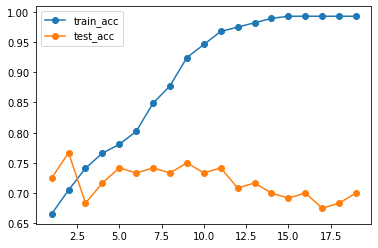

In [31]:
pyplot.plot(range(1,20), train_scores, '-o', label = 'train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label = 'test_acc')
pyplot.legend()
pyplot.show()

In [34]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
temp_y_pred = tree.predict(X_test)
temp_acc = accuracy_score(y_test, temp_y_pred)

print('정확도',format(temp_acc))

정확도 0.6916666666666667


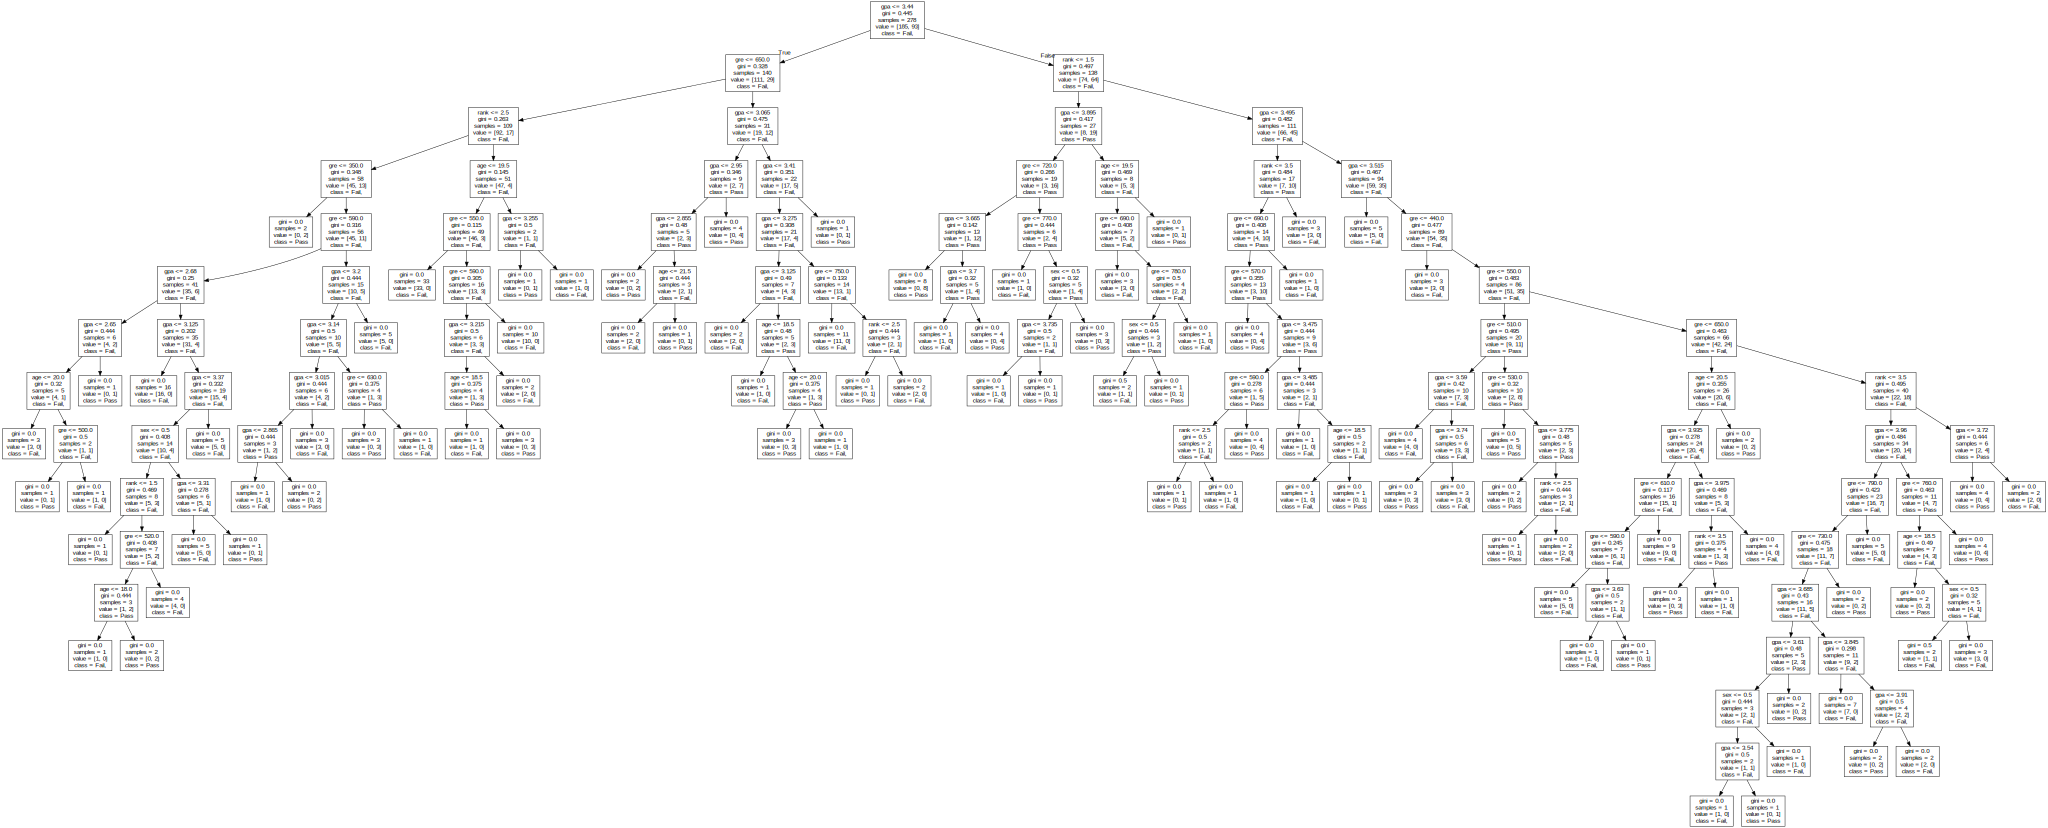

In [36]:
feature_neme = ['gre','gpa','rank','sex','age']
tree.graph = export_graphviz(tree, feature_names=feature_neme,
                       class_names=['Fail,','Pass'])
graphviz.Source(tree.graph)

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('accuracy :', accuracy_score(y_test, tree.predict(X_test)))
print('precision:', precision_score(y_test, tree.predict(X_test)))
print('recall:', recall_score(y_test, tree.predict(X_test)))
print('f1:', f1_score(y_test, tree.predict(X_test)))

accuracy : 0.6916666666666667
precision: 0.43333333333333335
recall: 0.3939393939393939
f1: 0.4126984126984127
